In [1]:
import random
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as skl
import torch.linalg as lin

# Implementation: Data Center temperature control

비즈니스 전체 영역에서의 언택트 환경이 확장됨에 따라 데이터 사용량이 급증하고 전세계적으로 대용량 데이터 관리를 위한 하이퍼스케일 데이터센터 건립이 증가하고 있습니다.

데이터의 용량과 속도가 빠르게 증가함에 따라 서버의 처리량도 증가하고 온도 또한 높아집니다.
서버의 온도 상승은 고장 및 성능 하락의 원인이 돼 이를 냉각시키는 과정이 필요하며 데이터센터 에너지 소비의 35% 이상이 서버 냉각에서 발생합니다.

그래서 데이터 센터의 온도 제어를 LQR을 통해서 최적의 온도 trajectory와 action sequence를 구해보고자 합니다.

편의상 데이터 센터의 온도는 선형적인 시스템에 의해서 가동이 되고 있다고 가정하고,
최적의 온도 또한 0도로 가정을 하겠습니다.

구역의 개수와 에어컨 개수를 각 3개로 예를 들자면 다음과 같이 시스템을 수식으로 나타낼 수 있습니다.
(수식의 계수들은 미리 정해두었습니다)

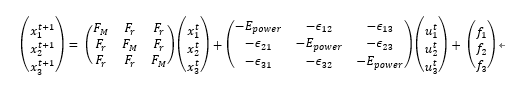

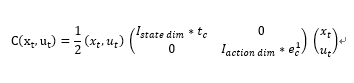

### coefficent

$F_M $ : 기존 구역의 temperature가 유지(Maintain)되는 정도

$F_r $ : 구역에서 다른 구역으로 temperature가 방출(Release)되는 비율

$E_power $: 에어컨 성능(Power)의 정도

$f_i $: i번째 구역에 외부로 부터 들어오는 열의 정도

$I $: 항등행렬, 밑의 첨자는 항등행렬의 크기

$t_c $: 현재 temperature에 대한 페널티 크기

$e^{1}_{c},$ : 사용한 에너지에 대한 페널티 크기

$ \epsilon_{ij} $: i구역의 에어컨 제어가 j 구역에 미치는 영향 정도(random term)

로 생각하시면 됩니다.

### Set coefficient

In [2]:
# number of sector and airconditioner
state_dim = 3
action_dim = 3
T = 20
total_dim = state_dim + action_dim

# matrix shape [(state_dim + action_dim) * (state_dim + action_dim)]
C = torch.eye(n=state_dim + action_dim)

# set t_c and e_c
C[:state_dim, :state_dim] = C[:state_dim, :state_dim] * 10
C[state_dim:, state_dim:] = C[state_dim:, state_dim:] * 5


# matrix shape [(state_dim + action_dim), 1)]
c = torch.zeros(size=(total_dim, 1))

# matrix shape [state_dim * (state_dim + action_dim)]
# set F_M, F_r, E_power, epsilon_ij
F = torch.zeros(size=(state_dim, total_dim))
for i in range(state_dim):
    for j in range(state_dim):
        if i != j:
            F[i, j] = random.uniform(0, 1) / 10
        else:
            F[i, i] = 0.9
for i in range(state_dim):
    for j in range(action_dim):
        if i != j:
            F[i, state_dim + j] = - random.uniform(0, 1) / 10
        else:
            F[j, state_dim + j] = - random.uniform(0.5, 1)
            
# matrix shape[(state_dim, 1)]
# set f_i
f = torch.rand(size=(state_dim, 1))

### initial temperature

In [3]:
x0 = torch.ones(size=(state_dim, 1)) * 50

### Check invertible

In [4]:
torch.matrix_rank(C) == total_dim

c:\users\hae1\anaconda3\envs\mpc\lib\site-packages\ipykernel_launcher.py:1: UserWarning: torch.matrix_rank is deprecated in favor of torch.linalg.matrix_rankand will be removed in a future PyTorch release. The parameter 'symmetric' was renamed in torch.linalg.matrix_rank to 'hermitian'. (Triggered internally at  ..\aten\src\ATen\native\LinearAlgebra.cpp:438.)
  """Entry point for launching an IPython kernel.


tensor(True)

# 직접 구현

### Usable functions

torch.matmul: Matrix product of two tensors(행렬 곱)

A.T: transpose matrix of A(전치행렬)

torch.linalg.inv(A): inverse matrix of A(역행렬)

torch.cat: Concatenates the given sequence of seq tensors in the given dimension(행렬 합치기)

### def calculate_Q

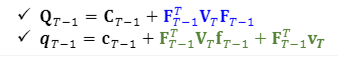

In [5]:
def calculate_Q(C, c, F, f, V_t, v_t, state_dim, action_dim):

    """
    input
    C : torch.tensor() with shape(state_dim + action_dim, state_dim + action_dim)
    c : torch.tensor() with shape(state_dim + action_dim, 1)
    F : torch.tensor() with shape(state_dim, state_dim + action_dim)
    f : torch.tensor() with shape(state_dim, 1)
    V_t : torch.tensor() with shape(state_dim, state_dim)
    v_t : torch.tensor() with shape(state_dim, 1)
    return
    Q_t : torch.tensor() with shape(state_dim + action_dim, state_dim + action_dim)
    q_t : torch.tensor() with shape(state_dim + action_dim, 1)
    """
    # -----------implementation------------
    
    
    
    
    return Q_t, q_t

### def calculate_V
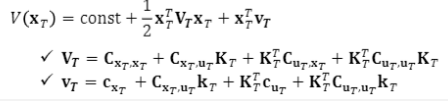

In [6]:
def calculate_V(C, c, K_t, k_t, state_dim, action_dim):
    
    """
    input
    C : torch.tensor() with shape(state_dim + action_dim, state_dim + action_dim)
    c : torch.tensor() with shape(state_dim + action_dim, 1)
    K_t : torch.tensor() with shape(action_dim, state_dim)
    k_t : torch.tensor() with shape(action_dim, 1)
    return
    V_t : torch.tensor() with shape(state_dim, state_dim)
    v_t : torch.tensor() with shape(state_dim, 1)
    """
    # -----------implementation------------
    
    
    
    
    
    
    return V_t, v_t

### def calculate_K
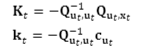

In [7]:
def calculate_K(Q, q, state_dim, action_dim):
    """
    input
    Q : torch.tensor() with shape(state_dim + action_dim, state_dim + action_dim)
    q : torch.tensor() with shape(state_dim + action_dim, 1)
    return
    K_t : torch.tensor() with shape(action_dim, state_dim)
    k_t : torch.tensor() with shape(action_dim, 1)
    """
    # -----------implementation------------

    
    
    
    
    
    return K_t, k_t

### backward recursion
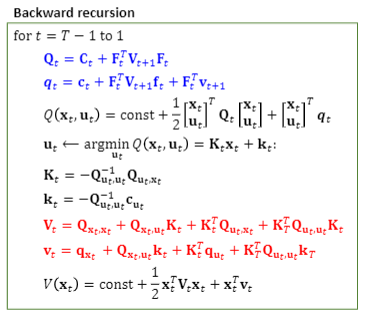

In [8]:
def backward_recursion(state_dim, action_dim, C, c, F, f, T):
    """
    input
    C : torch.tensor() with shape(state_dim + action_dim, state_dim + action_dim)
    c : torch.tensor() with shape(state_dim + action_dim, 1)
    F : torch.tensor() with shape(state_dim, state_dim + action_dim)
    f : torch.tensor() with shape(state_dim, 1)
    return
    Large_Q : dictionary of Q_t
    small_q : dictionary of q_t
    Large_K : dictionary of K_t
    small_k : dictionary of k_t
    Large_V : dictionary of V_t
    small_v : dictionary of v_t
    """
    
    # dictionary of K
    Large_K = dict()
    small_k = dict()

    # dictionary of V
    Large_V = dict()
    small_v = dict()

    # dictionary of Q
    Large_Q = dict()
    small_q = dict()
    
    
    """
    calculate K, k, V, v at time T and save result at dictionary mentioned above
    by using function calcualte V, K
    """
    # -----------implementation------------

    
    
    
    
    
    
    
    """
    calculate Q, q, K, k, V, v,at time T-1 to 1 and save result at dictionary mentioned above with for loop
    by using function calcualte V, K, Q
    """
    # -----------implementation------------

        
        
        
        
        
        
    return Large_Q, small_q, Large_K, small_k, Large_V, small_v

### def forward_recursion
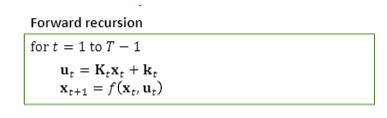

In [9]:
def forward_recursion(x0, Large_K, small_k, F, f, T):
    
    """
    input
    F : torch.tensor() with shape(state_dim, state_dim + action_dim)
    f : torch.tensor() with shape(state_dim, 1)
    K : torch.tensor() with shape(action_dim, state_dim)
    k : torch.tensor() with shape(action_dim, 1)
    return
    x_dict : dictionary of x
    u_dict : dictionary of u
    """
    
    x_dict = dict()
    u_dict = dict()
    
    x_dict[1] = x0
    
    """
    calculate x, u at time 1 to T-1 and save result at dictionary mentioned above with for loop
    """
    # -----------implementation------------
    
    
    
    
    
    
    
        
    return x_dict, u_dict

In [10]:
Large_Q, small_q, Large_K, small_k, Large_V, small_v = backward_recursion(state_dim, action_dim, C, c, F, f, T)

In [11]:
x_dict, u_dict = forward_recursion(x0, Large_K, small_k, F, f, T)

## Plot temperature and energy trajectory

### Chagne x_dict to xs, u_dict to us for plotting

In [17]:

def change_data(x_dict, u_dict, state_dim, action_dim):
    '''
    input
    x_dict: dictionary of x, key is time, value is temperature at time
    u_dict: dictionary of u, key is time, value is energy
    '''
    xs = dict()
    for state in range(state_dim):
        xs[state] = []
    us = dict()
    for action in range(action_dim):
        us[action] = []

    # -----------implementation--------------------------
    
    
    
    
    
    
    return xs, us

In [18]:
xs, us = change_data(x_dict, u_dict, state_dim, action_dim)

Text(0.5, 1.0, 'Temperature')

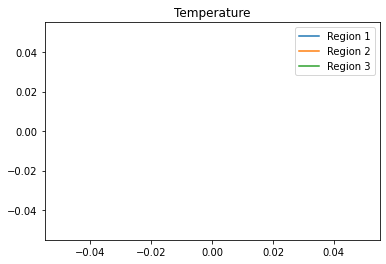

In [19]:
fig, ax = plt.subplots()

for state in range(state_dim):
    ax.plot(xs[state], label='Region {}'.format(state+1))

# plt.legend(["Region {}" + str(i+1) for i in range(state_dim)])
ax.legend()
ax.set_title("Temperature")

Text(0.5, 1.0, 'Energy')

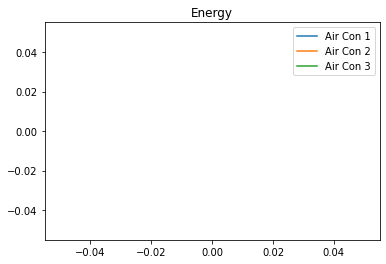

In [20]:
fig, ax = plt.subplots()

for action in range(action_dim):
    ax.plot(us[action], label='Air Con {}'.format(action+1))

# plt.legend(["Region {}" + str(i+1) for i in range(state_dim)])
ax.legend()
ax.set_title("Energy")